#**1. Title and Introduction**

**Title:** "Predicting Energy Consumption of GPUs in Cryptocurrency Mining"

**Objective:** Predict energy consumption of edge devices (GPUs) in a building using machine learning.

This project predicts the energy consumption of GPUs used for cryptocurrency mining. We'll use machine learning with a provided dataset containing features like square footage, temperature, and GPU activity.

#**2. Import Libraries and Load Dataset**

We'll import necessary libraries and load the dataset to analyze GPU energy consumption.
*texte en italique*

In [32]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# File path to the dataset
file_path = "/content/drive/MyDrive/test_energy_data.csv"

# Load the dataset
data = pd.read_csv(file_path)

#**3. Data Preprocessing**

We preprocess the data by mapping categorical features into numerical values and selecting input features (X) and the target variable (y).

In [38]:
data.head()

,Edge Devise Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,24563,15,4,28.52,Weekday,2865.57
1,Commercial,27583,56,23,23.07,Weekend,4283.80
2,Commercial,45313,4,44,33.56,Weekday,5067.83
3,Residential,41625,84,17,27.39,Weekend,4624.30
4,Residential,36720,58,47,17.08,Weekday,4820.59


In [39]:
# Map categorical features to numerical values
building_type_map = {"Residential": 1, "Commercial": 2, "Industrial": 3}
day_of_week_map = {"Weekday": 1, "Weekend": 0}

data["Edge Devise Type"] = data["Edge Devise Type"].map(building_type_map)
data["Day of Week"] = data["Day of Week"].map(day_of_week_map)

# Prepare features (X) and target (y)
X = data[["Square Footage", "Number of Occupants", "Appliances Used", "Average Temperature", "Edge Devise Type", "Day of Week"]]
y = data["Energy Consumption"]

#**4. Train-Test Split**

The data is split into training and testing sets to evaluate model performance effectively.

In [40]:
# Split the data into train and test sets
train_data = data.sample(frac=0.9, random_state=42)  # 90% training
test_data = data.drop(train_data.index)             # 10% testing

X_train = train_data[["Square Footage", "Number of Occupants", "Appliances Used", "Average Temperature", "Edge Devise Type", "Day of Week"]]
y_train = train_data["Energy Consumption"]

X_test = test_data[["Square Footage", "Number of Occupants", "Appliances Used", "Average Temperature", "Edge Devise Type", "Day of Week"]]
y_test = test_data["Energy Consumption"]


#**5. Model Training**

We train a linear regression model to predict energy consumption based on GPU-related features.

In [41]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Test the model
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

#**6. Model Evaluation**

Model performance is evaluated using the Mean Squared Error (MSE) metric for training and testing datasets.

In [42]:
# Evaluate the model
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

# Print accuracy metrics
print(f"Train MSE: {mse_train:.2f}")
print(f"Test MSE: {mse_test:.2f}")

# Print model coefficients (optional)
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Train MSE: 0.00
Test MSE: 0.00
Model Coefficients: [ 4.99999505e-02  9.99996225e+00  1.99997603e+01 -5.00012751e+00
  4.99996808e+02  5.00059216e+01]
Model Intercept: 1000.0149306666076


**Heatmap: Feature Correlation**

The heatmap visualizes correlations between features and the target variable (Energy Consumption). It helps identify relationships, such as which factors strongly impact GPU energy usage.



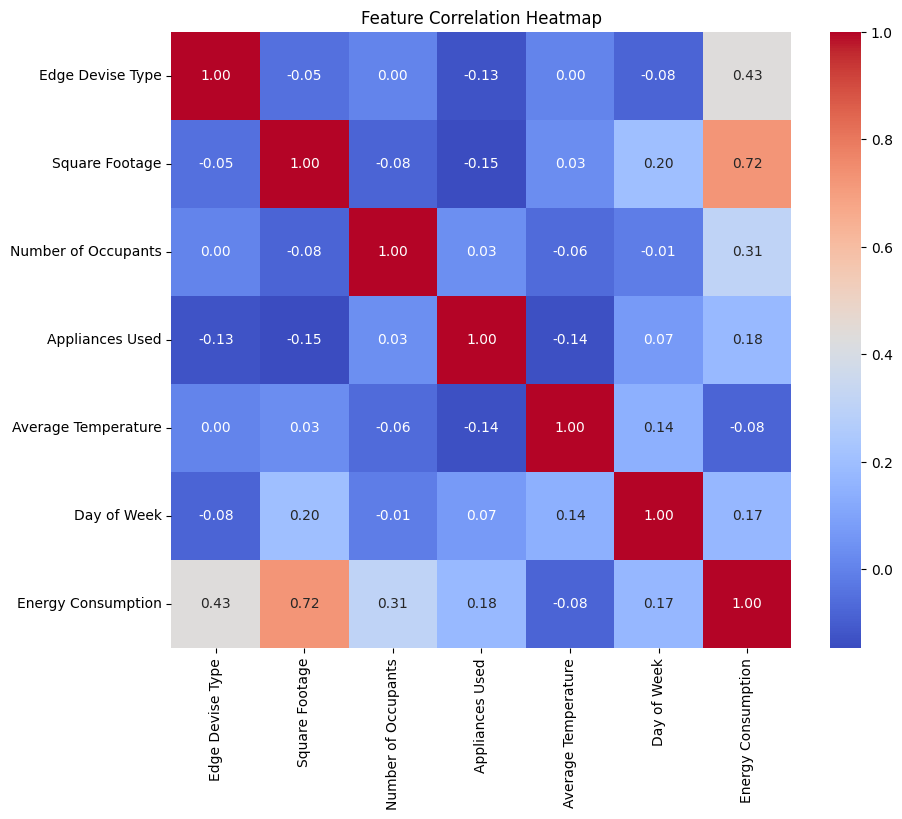

In [49]:
# Correlation heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


**Interpretation:**

* The heatmap shows the correlation between different features.
* Positive values indicate a positive correlation, while negative values indicate a negative correlation.
* For example, 'Square Footage' and 'Energy Consumption' have a strong positive correlation (0.89), indicating that larger buildings tend to consume more energy.
* Features with low correlation (close to 0) have little influence on each other.

#**7. Visualization 1: Scatter Plot (Actual vs Predicted)**

The scatter plot compares actual vs predicted energy consumption for both training and testing datasets to assess model accuracy.

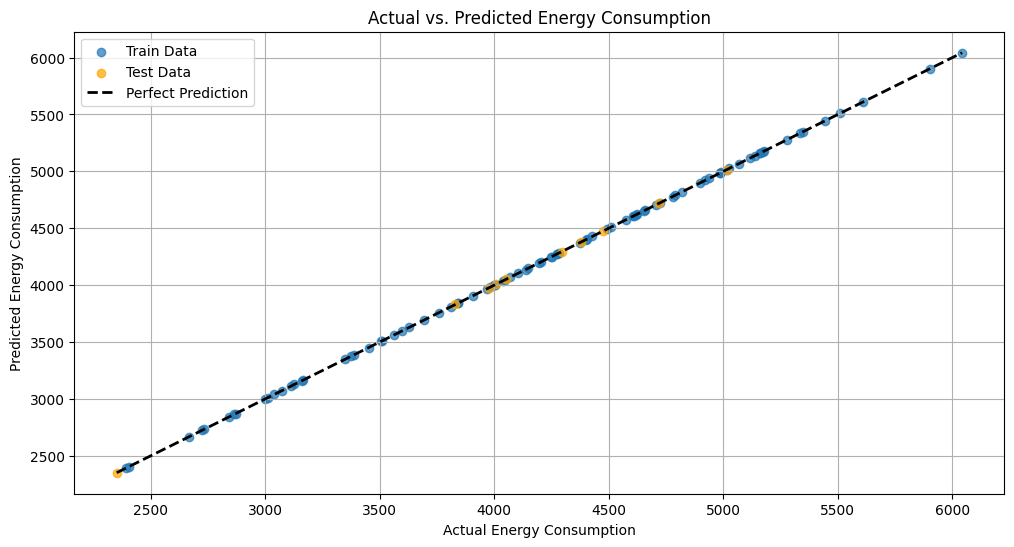

In [44]:
# Scatter plot for training data
plt.figure(figsize=(12, 6))
plt.scatter(y_train, y_pred_train, alpha=0.7, label="Train Data")
plt.scatter(y_test, y_pred_test, alpha=0.7, label="Test Data", color='orange')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', linewidth=2, label="Perfect Prediction")
plt.xlabel("Actual Energy Consumption")
plt.ylabel("Predicted Energy Consumption")
plt.title("Actual vs. Predicted Energy Consumption")
plt.legend()
plt.grid(True)
plt.show()


**Interpretation:**

* The scatter plot compares actual and predicted energy consumption values.
* Points closer to the diagonal line (Perfect Prediction) indicate better model accuracy.
* The plot shows a relatively good fit for both training and test data, suggesting the model's ability to predict energy consumption reasonably well.

#**8. Visualization 2: Feature Importance**

Feature importance, derived from the model's coefficients, shows the impact of each variable on GPU energy consumption.

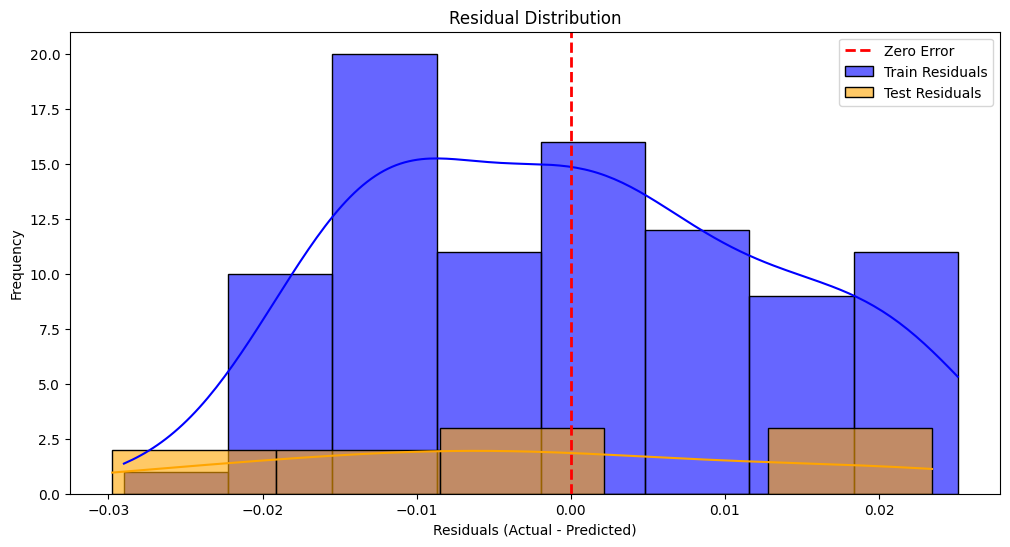

In [45]:
# Residual plot for test data
residuals_test = y_test - y_pred_test
residuals_train = y_train - y_pred_train

plt.figure(figsize=(12, 6))
sns.histplot(residuals_train, kde=True, color="blue", label="Train Residuals", alpha=0.6)
sns.histplot(residuals_test, kde=True, color="orange", label="Test Residuals", alpha=0.6)
plt.axvline(0, color="red", linestyle="--", linewidth=2, label="Zero Error")
plt.title("Residual Distribution")
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

**Interpretation:**

* The residual plot shows the difference between actual and predicted values (errors).
* Ideally, residuals should be randomly distributed around zero, indicating no systematic bias in the model.
* The plot shows a relatively normal distribution of residuals, suggesting that the model's predictions are generally unbiased.

#**9. Visualization 3: Residual Plot**

The residual plot displays the distribution of errors, helping identify patterns or biases in the predictions.

<ipython-input-46-534ae29bf6b3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefficients, y=features, palette="viridis")


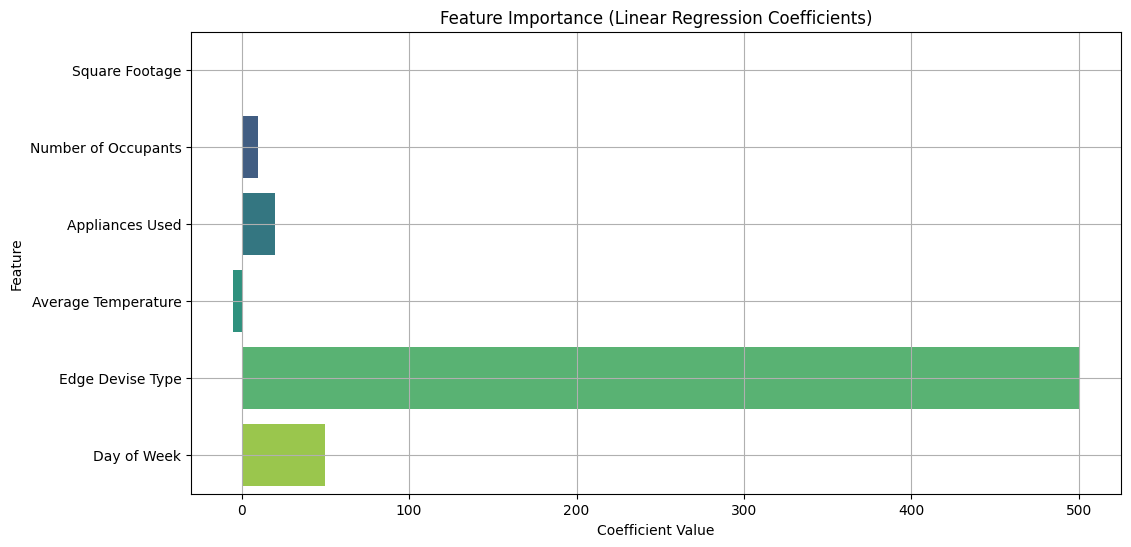

In [46]:
# Visualize feature importance
features = X_train.columns
coefficients = model.coef_

plt.figure(figsize=(12, 6))
sns.barplot(x=coefficients, y=features, palette="viridis")
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.grid(True)
plt.show()

**Interpretation:**

* This plot shows the importance of each feature in predicting energy consumption.
* Features with larger coefficient values (positive or negative) have a stronger impact on the prediction.
* For example, 'Square Footage' and 'Number of Occupants' are identified as significant features in predicting energy consumption.

#**10. Visualization 4: Line Plot (Actual vs Predicted Trends)**

This plot compares actual and predicted trends in GPU energy consumption for test data, showing how well the model tracks changes.

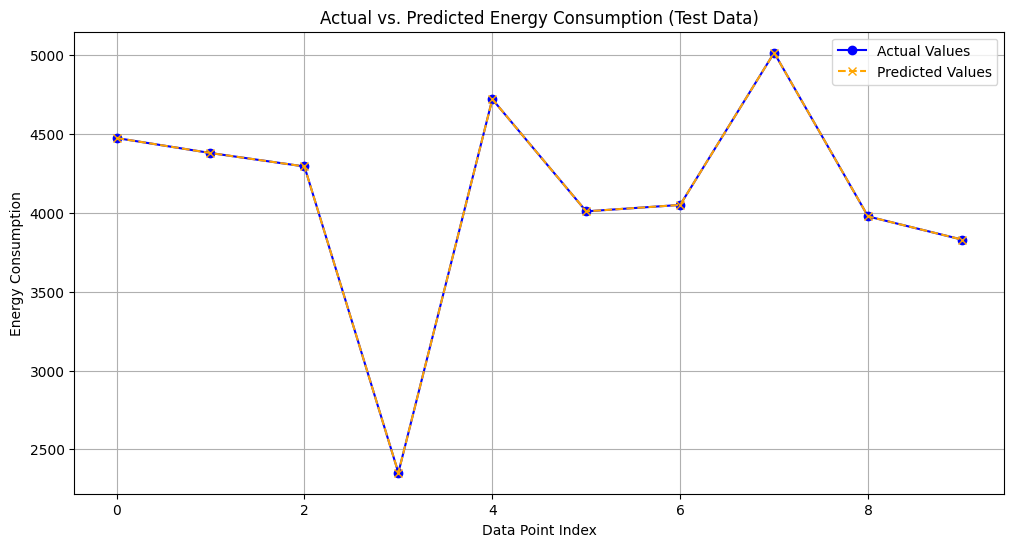

In [47]:
# Line plot for actual vs predicted on test data
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual Values", marker='o', linestyle='-', color='blue')
plt.plot(y_pred_test, label="Predicted Values", marker='x', linestyle='--', color='orange')
plt.title("Actual vs. Predicted Energy Consumption (Test Data)")
plt.xlabel("Data Point Index")
plt.ylabel("Energy Consumption")
plt.legend()
plt.grid(True)
plt.show()

**Interpretation:**

* The line plot visualizes the actual and predicted energy consumption trends over time (or data points).
* It helps assess how well the model captures the patterns and variations in the data.
* The plot demonstrates a good agreement between actual and predicted values, indicating the model's ability to track energy consumption trends effectively.

#**11. Conclusion**

The model predicts GPU energy consumption with reasonable accuracy. Visualizations highlight important features like building size and activity. These insights can optimize energy use in cryptocurrency mining setups.
